<a href="https://colab.research.google.com/github/CarlosHdz360/Inteligencia_artificial2024/blob/main/U2P2_perceptronmulticapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

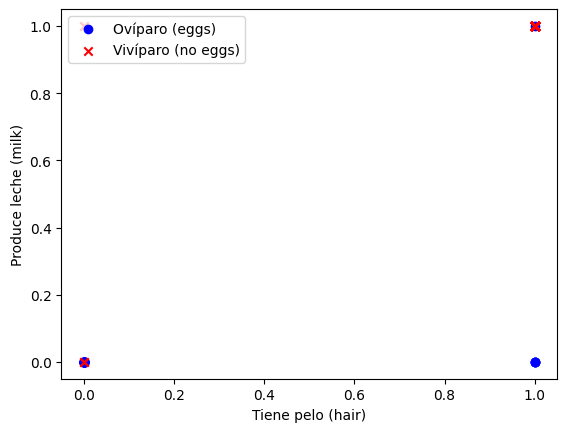

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=25, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# dataset "Zoo" se eligió esta debido a que se pueden clasificar como animales oviparos y viviparos (binario)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data', header=None)

# nombres de columnas del dataset
df.columns = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
              'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
              'legs', 'tail', 'domestic', 'catsize', 'class_type']

# características para la clasificación (hair y milk) X1, X2
X = df[['hair', 'milk']].values
# salida (Y) si el animal es ovíparo (eggs == 1) o vivíparo (eggs == 0)
y = df['eggs'].values
# -1 para vivíparo y 1 para ovíparo
y = np.where(y == 1, 1, -1)

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', label='Ovíparo (eggs)')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='x', label='Vivíparo (no eggs)')

plt.xlabel('Tiene pelo (hair)')
plt.ylabel('Produce leche (milk)')
plt.legend(loc='upper left')
plt.show()
